In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kstest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
data = pd.read_excel('月度数据 .xls')
name = data.columns
data = data.reindex(index=data.index[::-1])
data.index = [i for i in range(len(data))]
data

,时间,居民消费价格指数(上月=100),籼稻（中等）集贸市场价格当期值(元/公斤),小麦（中等）集贸市场价格当期值(元/公斤),粳稻（中等）集贸市场价格当期值(元/公斤),棉花[籽棉]（中准级）集贸市场价格当期值(元/公斤),花生仁（中等）集贸市场价格当期值(元/公斤),油菜籽（普通）集贸市场价格当期值(元/公斤),活猪（中等）集贸市场价格当期值(元/公斤),活牛（中等）集贸市场价格当期值(元/公斤),活羊（中等）集贸市场价格当期值(元/公斤),草鱼（1-2公斤）集贸市场价格当期值(元/公斤),鲤鱼（1-2公斤）集贸市场价格当期值(元/公斤),鲢鱼（1-2公斤）集贸市场价格当期值(元/公斤),大白菜（中等）集贸市场价格当期值(元/公斤),黄瓜（中等）集贸市场价格当期值(元/公斤),西红柿（中等）集贸市场价格当期值(元/公斤),红富士苹果（中等）集贸市场价格当期值(元/公斤),香蕉（中等）集贸市场价格当期值(元/公斤),橙子（中等）集贸市场价格当期值(元/公斤)
0,2013-01-01,NaN,2.75,2.48,3.09,8.19,14.09,5.26,16.95,25.20,28.68,15.23,13.16,10.99,2.14,6.17,6.11,8.21,4.82,6.52
1,2013-02-01,NaN,2.76,2.50,3.10,8.23,14.03,5.30,15.77,25.75,28.95,15.60,13.21,11.09,2.18,6.95,6.07,8.36,5.20,6.85
2,2013-03-01,NaN,2.75,2.49,3.10,8.08,13.94,5.38,14.07,25.80,28.95,15.51,13.05,10.93,2.17,6.24,5.78,8.33,5.41,7.00
3,2013-04-01,NaN,2.74,2.49,3.09,8.03,13.80,5.41,12.84,25.89,29.22,15.86,12.90,11.05,3.31,4.97,6.25,8.33,5.75,7.11
4,2013-05-01,NaN,2.72,2.48,3.08,8.03,13.53,5.25,13.30,26.03,29.35,16.08,12.80,11.11,2.73,3.62,4.73,8.65,6.34,7.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2021-12-01,99.7,2.90,2.91,3.16,8.01,13.62,6.01,17.51,37.17,39.43,19.45,15.91,14.07,3.32,8.31,8.42,9.42,6.65,10.40
108,2022-01-01,100.4,2.90,2.94,3.15,8.28,13.62,6.00,15.83,37.56,39.54,19.61,16.32,14.16,3.33,11.32,11.19,9.74,7.48,10.28
109,2022-02-01,100.6,2.89,2.96,3.13,8.31,13.49,6.01,14.06,37.36,39.00,19.37,16.07,14.26,3.30,8.95,10.43,9.71,7.61,10.30
110,2022-03-01,100.0,2.90,3.11,3.17,8.31,13.45,5.98,13.06,37.38,38.98,19.14,16.09,14.49,4.03,9.57,9.61,9.95,7.59,10.16


In [6]:
cpid = (data[[name[0],name[1]]].copy(deep=True)).dropna()
cpid.index = [i for i in range(len(cpid))]

from datetime import datetime
cpid[name[0]] = pd.to_datetime(cpid[name[0]])
cpid
# plt.plot()

,时间,居民消费价格指数(上月=100)
0,2016-01-01,100.5
1,2016-02-01,101.6
2,2016-03-01,99.6
3,2016-04-01,99.8
4,2016-05-01,99.5
...,...,...
71,2021-12-01,99.7
72,2022-01-01,100.4
73,2022-02-01,100.6
74,2022-03-01,100.0


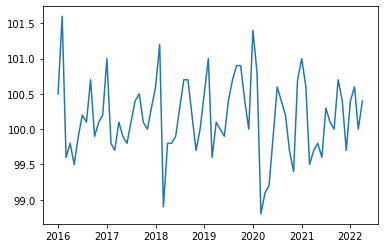

In [7]:
date = cpid[name[0]]
cpi = cpid[name[1]]
plt.plot(date,cpi)
# plt.savefig('cpi.pdf')
plt.show()

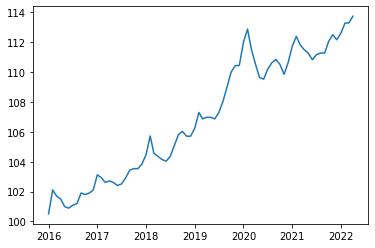

In [8]:
cpi_adj = []
cpi_adj.append(cpi[0])
for i in range(len(cpi)-1):
    c = cpi_adj[i]*cpi[i+1]/100
    cpi_adj.append(c)
plt.plot(date,cpi_adj)
# plt.savefig('cpi_adj.pdf')
plt.show() 

In [9]:
m1 = data[[name[3],name[6],name[8],name[12],name[15],name[18]]].copy(deep=True)
name1 = m1.columns
m1

,小麦（中等）集贸市场价格当期值(元/公斤),花生仁（中等）集贸市场价格当期值(元/公斤),活猪（中等）集贸市场价格当期值(元/公斤),鲤鱼（1-2公斤）集贸市场价格当期值(元/公斤),黄瓜（中等）集贸市场价格当期值(元/公斤),香蕉（中等）集贸市场价格当期值(元/公斤)
0,2.48,14.09,16.95,13.16,6.17,4.82
1,2.50,14.03,15.77,13.21,6.95,5.20
2,2.49,13.94,14.07,13.05,6.24,5.41
3,2.49,13.80,12.84,12.90,4.97,5.75
4,2.48,13.53,13.30,12.80,3.62,6.34
...,...,...,...,...,...,...
107,2.91,13.62,17.51,15.91,8.31,6.65
108,2.94,13.62,15.83,16.32,11.32,7.48
109,2.96,13.49,14.06,16.07,8.95,7.61
110,3.11,13.45,13.06,16.09,9.57,7.59


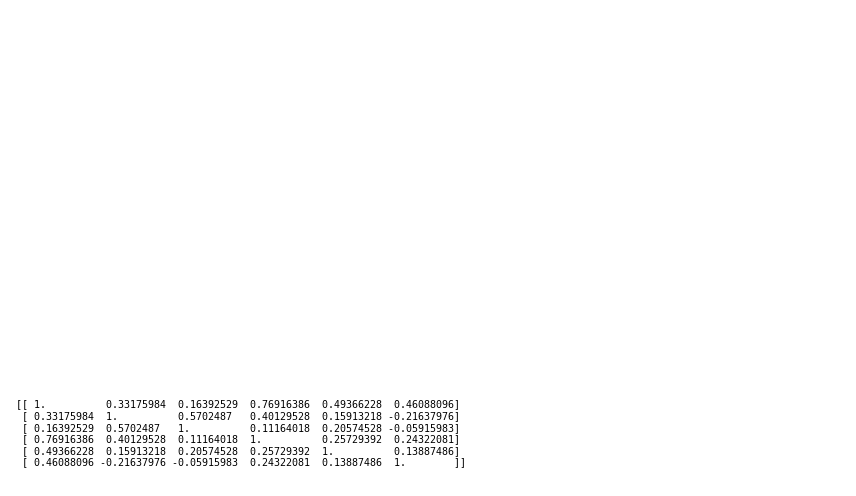

In [10]:
# # 设置中文编码和符号的正常显示
# plt.rcParams["font.sans-serif"] = "SimHei"
# plt.rcParams["axes.unicode_minus"] = False
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(m1.corr().values), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
# plt.savefig('corr.pdf')
# m1.corr()

In [11]:
import statsmodels.stats.diagnostic
adfResult1 = sm.tsa.stattools.adfuller(m1[name1[0]])
adfResult2 = sm.tsa.stattools.adfuller(m1[name1[1]])
adfResult3 = sm.tsa.stattools.adfuller(m1[name1[2]])
adfResult4 = sm.tsa.stattools.adfuller(m1[name1[3]])
adfResult5 = sm.tsa.stattools.adfuller(m1[name1[4]])
adfResult6 = sm.tsa.stattools.adfuller(m1[name1[5]])
adfResult1, adfResult2, adfResult3, adfResult4, adfResult5, adfResult6


((2.207749006913245,
  0.9988888206197162,
  1,
  110,
  {'1%': -3.4912451337340342,
   '5%': -2.8881954545454547,
   '10%': -2.5809876033057852},
  -437.26210475798985),
 (-2.2649159185151313,
  0.18353299775714838,
  1,
  110,
  {'1%': -3.4912451337340342,
   '5%': -2.8881954545454547,
   '10%': -2.5809876033057852},
  -101.63450484809664),
 (-1.9263572503814117,
  0.3197652054273256,
  1,
  110,
  {'1%': -3.4912451337340342,
   '5%': -2.8881954545454547,
   '10%': -2.5809876033057852},
  407.1894258528848),
 (-2.3065452461507916,
  0.16986568840083022,
  1,
  110,
  {'1%': -3.4912451337340342,
   '5%': -2.8881954545454547,
   '10%': -2.5809876033057852},
  43.94473304760601),
 (0.25554661324521605,
  0.975210505194957,
  10,
  101,
  {'1%': -3.4968181663902103,
   '5%': -2.8906107514600103,
   '10%': -2.5822770483285953},
  263.7524254775026),
 (-2.798594275376281,
  0.05847484655430476,
  3,
  108,
  {'1%': -3.4924012594942333,
   '5%': -2.8886968193364835,
   '10%': -2.58125527091

In [12]:
m11 = m1.diff().dropna()
adfResult1 = sm.tsa.stattools.adfuller(m11[name1[0]])
adfResult2 = sm.tsa.stattools.adfuller(m11[name1[1]])
adfResult3 = sm.tsa.stattools.adfuller(m11[name1[2]])
adfResult4 = sm.tsa.stattools.adfuller(m11[name1[3]])
adfResult5 = sm.tsa.stattools.adfuller(m11[name1[4]])
adfResult6 = sm.tsa.stattools.adfuller(m11[name1[5]])
adfResult1, adfResult2, adfResult3, adfResult4, adfResult5, adfResult6

((-7.891536963673879,
  4.4230116313573825e-12,
  0,
  110,
  {'1%': -3.4912451337340342,
   '5%': -2.8881954545454547,
   '10%': -2.5809876033057852},
  -428.77678432565415),
 (-5.92139399150257,
  2.5015926898921707e-07,
  0,
  110,
  {'1%': -3.4912451337340342,
   '5%': -2.8881954545454547,
   '10%': -2.5809876033057852},
  -98.52647980283206),
 (-7.654805466226079,
  1.7504784916923463e-11,
  0,
  110,
  {'1%': -3.4912451337340342,
   '5%': -2.8881954545454547,
   '10%': -2.5809876033057852},
  405.34252758418893),
 (-5.957062706623546,
  2.0811390966142176e-07,
  3,
  107,
  {'1%': -3.492995948509562,
   '5%': -2.888954648057252,
   '10%': -2.58139291903223},
  47.583543701077474),
 (-8.926059154680853,
  1.010603187342084e-14,
  9,
  101,
  {'1%': -3.4968181663902103,
   '5%': -2.8906107514600103,
   '10%': -2.5822770483285953},
  260.3382372592131),
 (-7.697729864945461,
  1.3650732557033312e-11,
  1,
  109,
  {'1%': -3.49181775886872,
   '5%': -2.8884437992971588,
   '10%': -2.

In [13]:
from statsmodels.tsa.stattools import coint
c=[]
for i in range(5):
    for j in range(i+1,6):
        c.append(coint(m11[name1[i]],m11[name1[j]])[1])
c

[3.7944761446709696e-11,
 5.6650734297401955e-11,
 4.1974384901542956e-11,
 1.571125632531872e-10,
 2.3952266770030205e-11,
 1.4050118223059417e-06,
 3.323609186664604e-06,
 2.4405406556407368e-06,
 1.6947364044637295e-06,
 2.13462140917472e-11,
 9.498645132206767e-11,
 2.0062078357777412e-10,
 1.626602232542782e-06,
 2.4495993845569323e-06,
 8.080175996079084e-13]

/home/moriarty/anaconda3/envs/mathe/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -14.16      -14.00   7.088e-07      -14.09
1       -15.19     -14.06*   2.544e-07     -14.73*
2       -15.12      -13.03   2.730e-07      -14.28
3       -14.96      -11.90   3.274e-07      -13.73
4       -15.04      -11.01   3.169e-07      -13.41
5       -14.91      -9.912   3.873e-07      -12.89
6       -15.14      -9.168   3.464e-07      -12.72
7       -15.17      -8.235   3.943e-07      -12.37
8       -15.74      -7.833   2.825e-07      -12.54
9       -16.26      -7.384  2.330e-07*      -12.67
10      -16.32      -6.482   3.431e-07      -12.35
11      -17.06      -6.255   3.081e-07      -12.70
12     -18.19*      -6.415   2.471e-07      -13.43
--------------------------------------------------


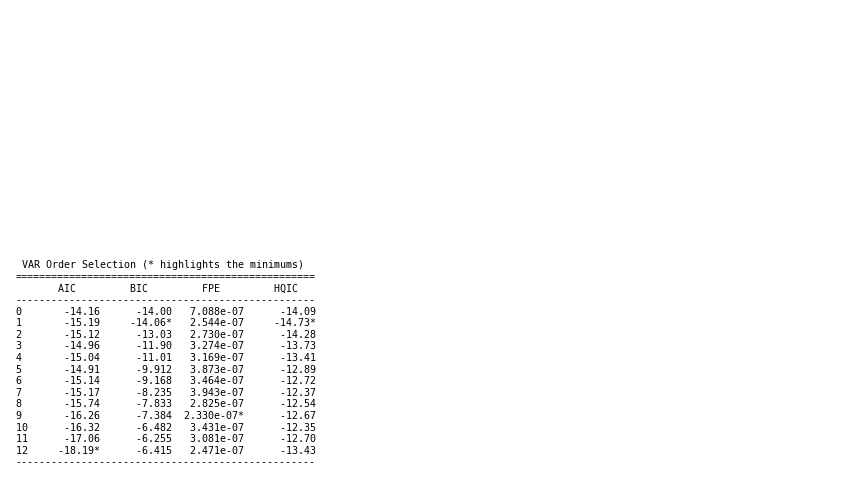

In [14]:
m11.columns = [1,2,3,4,5,6]
m10 = m11.head(len(m11)-4)

from statsmodels.tsa.vector_ar.var_model import VAR
mod = VAR(m10)
lag_order = mod.select_order()
print(lag_order.summary())
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(lag_order.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
# plt.savefig('lag.pdf')

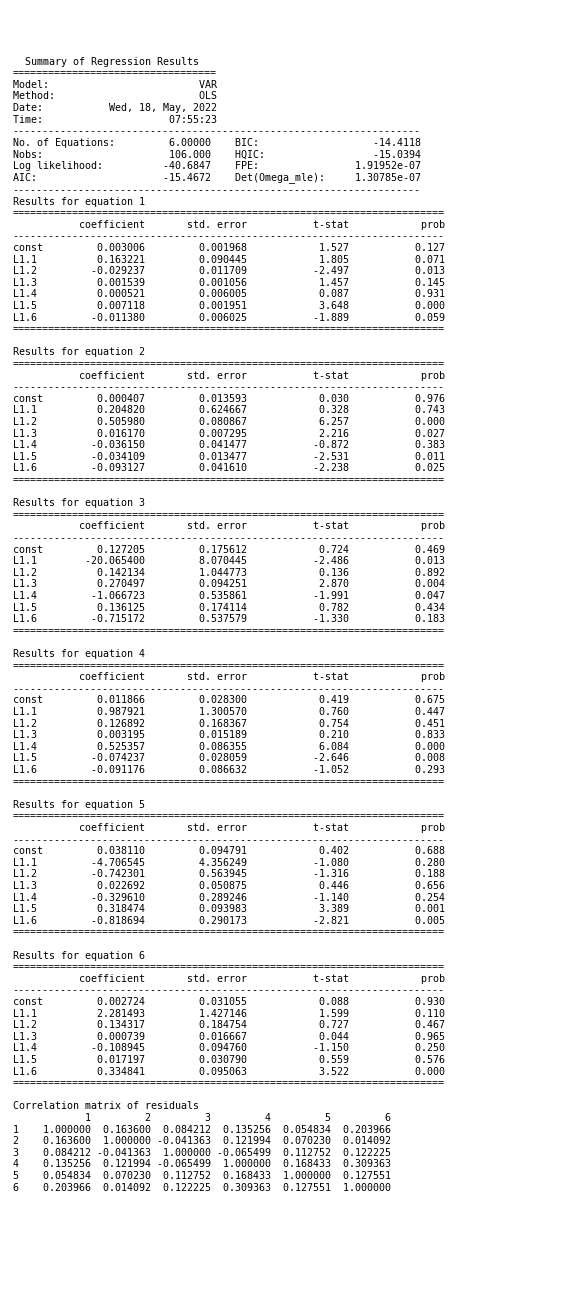

In [15]:
res = mod.fit(1)
res.summary()
# # 设置中文编码和符号的正常显示
# plt.rcParams["font.sans-serif"] = "SimHei"
# plt.rcParams["axes.unicode_minus"] = False
plt.rc('figure', figsize=(8, 20))
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
# plt.savefig('var1.pdf')

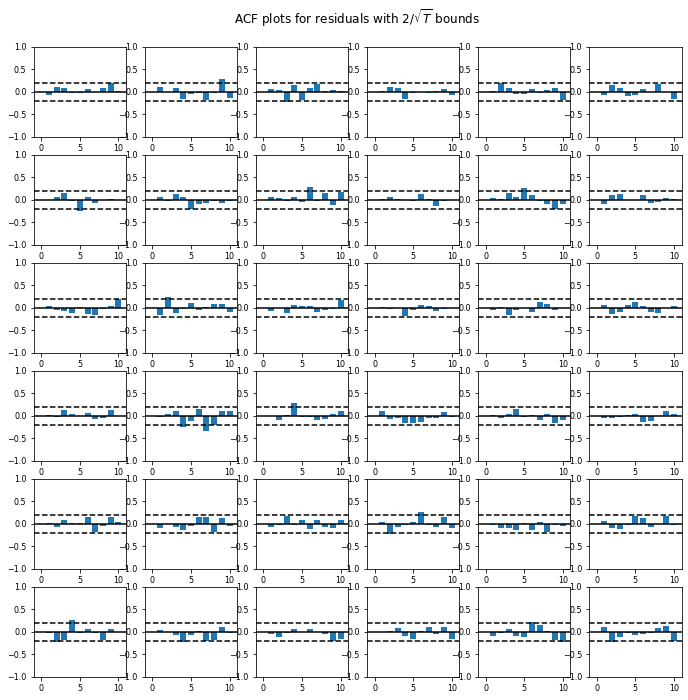

In [16]:
# 绘制残差项自相关图，最大滞后系数=10
res.plot_acorr(nlags=10, resid=True, linewidth=6)
# plt.savefig('acf.pdf')
plt.show()

In [17]:
from statsmodels.tsa.stattools import acf
# 以USDCNY变量为例，调用acf函数获得Q检验结果
pvalue = [i for i in range(6)]
for i in range(6):
    (resid_acf, qstat, pvalue[i]) = acf(res.resid[i+1], nlags=10, qstat=True)
pvalue

[array([0.52740219, 0.4384854 , 0.49037819, 0.64767928, 0.77306447,
        0.79696484, 0.87616611, 0.87238704, 0.45788608, 0.55245569]),
 array([0.49107943, 0.74735034, 0.51245593, 0.61830119, 0.16763974,
        0.18792779, 0.23932733, 0.31682872, 0.36286832, 0.44770081]),
 array([0.47051762, 0.76221575, 0.52713904, 0.63919973, 0.73425818,
        0.80729527, 0.75780236, 0.81106089, 0.8668216 , 0.61634637]),
 array([0.25724948, 0.42584887, 0.5648922 , 0.26907737, 0.14589302,
        0.10697081, 0.15511247, 0.20354774, 0.22310506, 0.28581413]),
 array([0.79108719, 0.54843777, 0.5303361 , 0.35351412, 0.48682279,
        0.33834312, 0.43503051, 0.18594445, 0.2542709 , 0.30858343]),
 array([0.23637255, 0.02322106, 0.02940898, 0.06009484, 0.08360409,
        0.12794423, 0.18925959, 0.22232667, 0.1699084 , 0.0566266 ])]

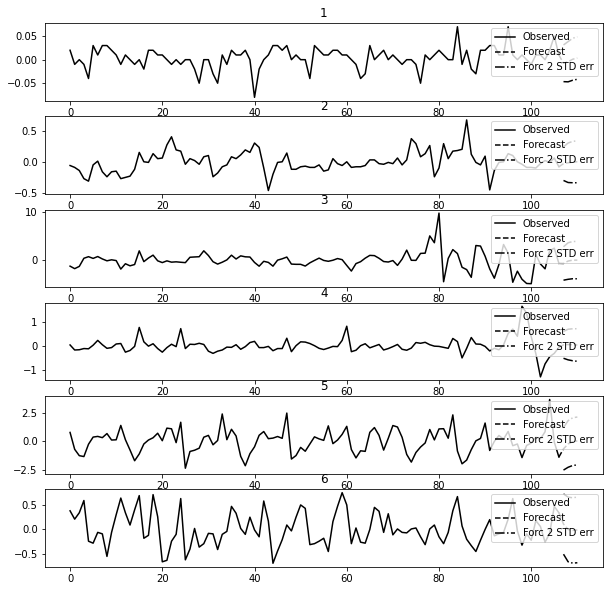

In [18]:
res.plot_forecast(4)
# plt.savefig('figfore.pdf')
plt.show()


In [19]:
pred1 = res.forecast(m10.values,4)
pred =  []
p = [m1[name1[j]][len(m1)-5] for j in range(6)]
for i in range(4):
    pp = []
    for j in range(6):
        pp.append(p[j]+pred1[i][j])
    pred.append(pp)
pred

[[2.902280321272739,
  13.58999158069317,
  16.886550954670945,
  15.96563041907825,
  7.642486441956241,
  6.75974623025392],
 [2.905692836511342,
  13.6040973068012,
  17.390502297148515,
  15.97721360361234,
  8.071800968609043,
  6.649827339546092],
 [2.910925652058547,
  13.615256581258999,
  17.585046307792556,
  15.968221206385945,
  8.279602161916474,
  6.629195997890103],
 [2.913462070842795,
  13.620279071347579,
  17.586891727180515,
  15.95715873780814,
  8.337138685506876,
  6.640422431775173]]

In [20]:
m01 = m1.head(len(m1)-4)
for i in range(4):
    m01.loc[i+len(m01)] = pred[i]
# m01.append(pred[0],ignore_index=True)
m01

/home/moriarty/anaconda3/envs/mathe/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,小麦（中等）集贸市场价格当期值(元/公斤),花生仁（中等）集贸市场价格当期值(元/公斤),活猪（中等）集贸市场价格当期值(元/公斤),鲤鱼（1-2公斤）集贸市场价格当期值(元/公斤),黄瓜（中等）集贸市场价格当期值(元/公斤),香蕉（中等）集贸市场价格当期值(元/公斤)
0,2.480000,14.090000,16.950000,13.160000,6.170000,4.820000
1,2.500000,14.030000,15.770000,13.210000,6.950000,5.200000
2,2.490000,13.940000,14.070000,13.050000,6.240000,5.410000
3,2.490000,13.800000,12.840000,12.900000,4.970000,5.750000
4,2.480000,13.530000,13.300000,12.800000,3.620000,6.340000
...,...,...,...,...,...,...
107,2.910000,13.620000,17.510000,15.910000,8.310000,6.650000
108,2.902280,13.589992,16.886551,15.965630,7.642486,6.759746
110,2.905693,13.604097,17.390502,15.977214,8.071801,6.649827
112,2.910926,13.615257,17.585046,15.968221,8.279602,6.629196


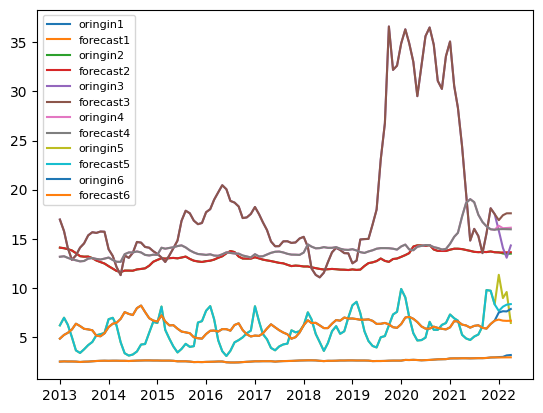

In [21]:
# import matplotlib as mpl
plt.style.use('default')
date1 = pd.to_datetime(data[name[0]])
# Plot
# plt.figure(figsize=(12,5), dpi=100)
for i in range(6):
    plt.plot(date1,m1.loc[:,name1[i]], label='oringin'+str(i+1))
    # plt.plot(test, label='actual')
    plt.plot(date1,m01.loc[:,name1[i]], label='forecast'+str(i+1))
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
# plt.savefig('predict.pdf')
plt.show()

In [174]:
pred[0]

[2.902280321272739,
 13.58999158069317,
 16.886550954670938,
 15.965630419078252,
 7.64248644195624,
 6.75974623025392]

In [182]:
m1

,小麦（中等）集贸市场价格当期值(元/公斤),花生仁（中等）集贸市场价格当期值(元/公斤),活猪（中等）集贸市场价格当期值(元/公斤),鲤鱼（1-2公斤）集贸市场价格当期值(元/公斤),黄瓜（中等）集贸市场价格当期值(元/公斤),香蕉（中等）集贸市场价格当期值(元/公斤)
0,2.48,14.09,16.95,13.16,6.17,4.82
1,2.50,14.03,15.77,13.21,6.95,5.20
2,2.49,13.94,14.07,13.05,6.24,5.41
3,2.49,13.80,12.84,12.90,4.97,5.75
4,2.48,13.53,13.30,12.80,3.62,6.34
...,...,...,...,...,...,...
107,2.91,13.62,17.51,15.91,8.31,6.65
108,2.94,13.62,15.83,16.32,11.32,7.48
109,2.96,13.49,14.06,16.07,8.95,7.61
110,3.11,13.45,13.06,16.09,9.57,7.59


In [110]:
m2 = data[[name[3],name[6],name[8],name[12],name[15],name[18],name[1]]].copy(deep=True)
m2 = m2.dropna()
m2['cpi_adj'] = cpi_adj
m2.index = [str(i) for i in range(len(m2))]
name2 = m2.columns
# m2.columns = [i for i in range(7)]
# m2.rename(columns={'6':'cpi_adj'})
y = cpi_adj
x = m2[[name2[i] for i in range(6)]]
x.columns = [i for i in range(1,7)]
m2

,小麦（中等）集贸市场价格当期值(元/公斤),花生仁（中等）集贸市场价格当期值(元/公斤),活猪（中等）集贸市场价格当期值(元/公斤),鲤鱼（1-2公斤）集贸市场价格当期值(元/公斤),黄瓜（中等）集贸市场价格当期值(元/公斤),香蕉（中等）集贸市场价格当期值(元/公斤),居民消费价格指数(上月=100),cpi_adj
0,2.45,12.71,17.70,13.35,7.66,5.29,100.5,100.500000
1,2.46,12.76,18.01,13.41,8.13,5.62,101.6,102.108000
2,2.47,12.87,18.97,13.28,6.80,5.64,99.6,101.699568
3,2.49,13.06,19.73,13.26,4.64,5.54,99.8,101.496169
4,2.49,13.21,20.45,13.41,3.54,5.79,99.5,100.988688
...,...,...,...,...,...,...,...,...
71,2.91,13.62,17.51,15.91,8.31,6.65,99.7,112.168263
72,2.94,13.62,15.83,16.32,11.32,7.48,100.4,112.616937
73,2.96,13.49,14.06,16.07,8.95,7.61,100.6,113.292638
74,3.11,13.45,13.06,16.09,9.57,7.59,100.0,113.292638


In [111]:
# from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 小写的 ols 函数才会自带截距项，OLS 则不会
# 固定格式：因变量 ~ 自变量(+ 号连接)

x = sm.add_constant(x)
regression = sm.OLS(y, x) #用最小二乘法建模
model = regression.fit() #数据拟合
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     190.5
Date:                Wed, 18 May 2022   Prob (F-statistic):           6.68e-41
Time:                        10:44:53   Log-Likelihood:                -105.50
No. Observations:                  76   AIC:                             225.0
Df Residuals:                      69   BIC:                             241.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.9046      2.858     20.611      0.000      53.203      64.606
1             13.7605      1.556      8.844      0.000      10.657      16.864
2             -1.1297      0.269     -4.200      0.000      -1.666      -0.593
3              0.3017      0.022     13.585      0.000       0.257       0.346
4              0.9411      0.156      6.045      0.000       0.630       1.252
5              0.1300      0.083      1.567      0.122      -0.035       0.296
6              1.0193      0.236      4.326      0.000       0.549       1.489
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.419
Skew:                           0.173   Prob(JB):                        0.811
Kurtosis:                       3.115   Cond. No.                         750.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

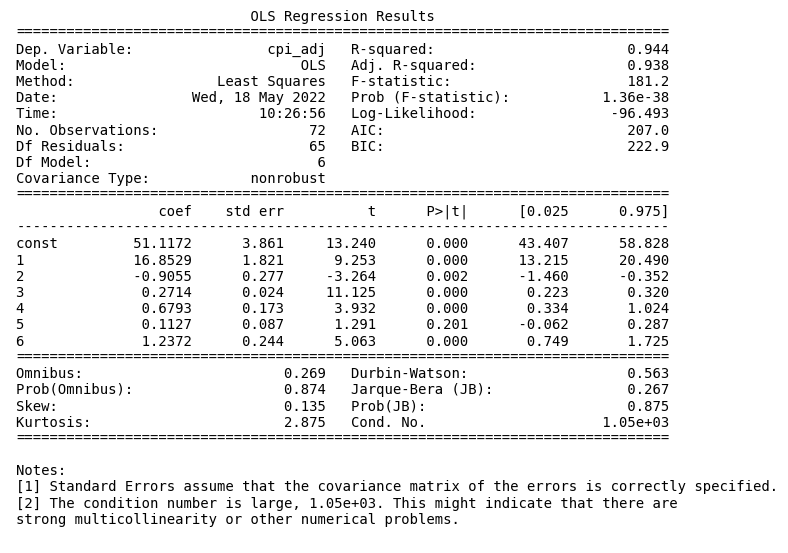

In [99]:
plt.rc('figure', figsize=(8, 5.4))
# plt.style.use('default')
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('ols.pdf')

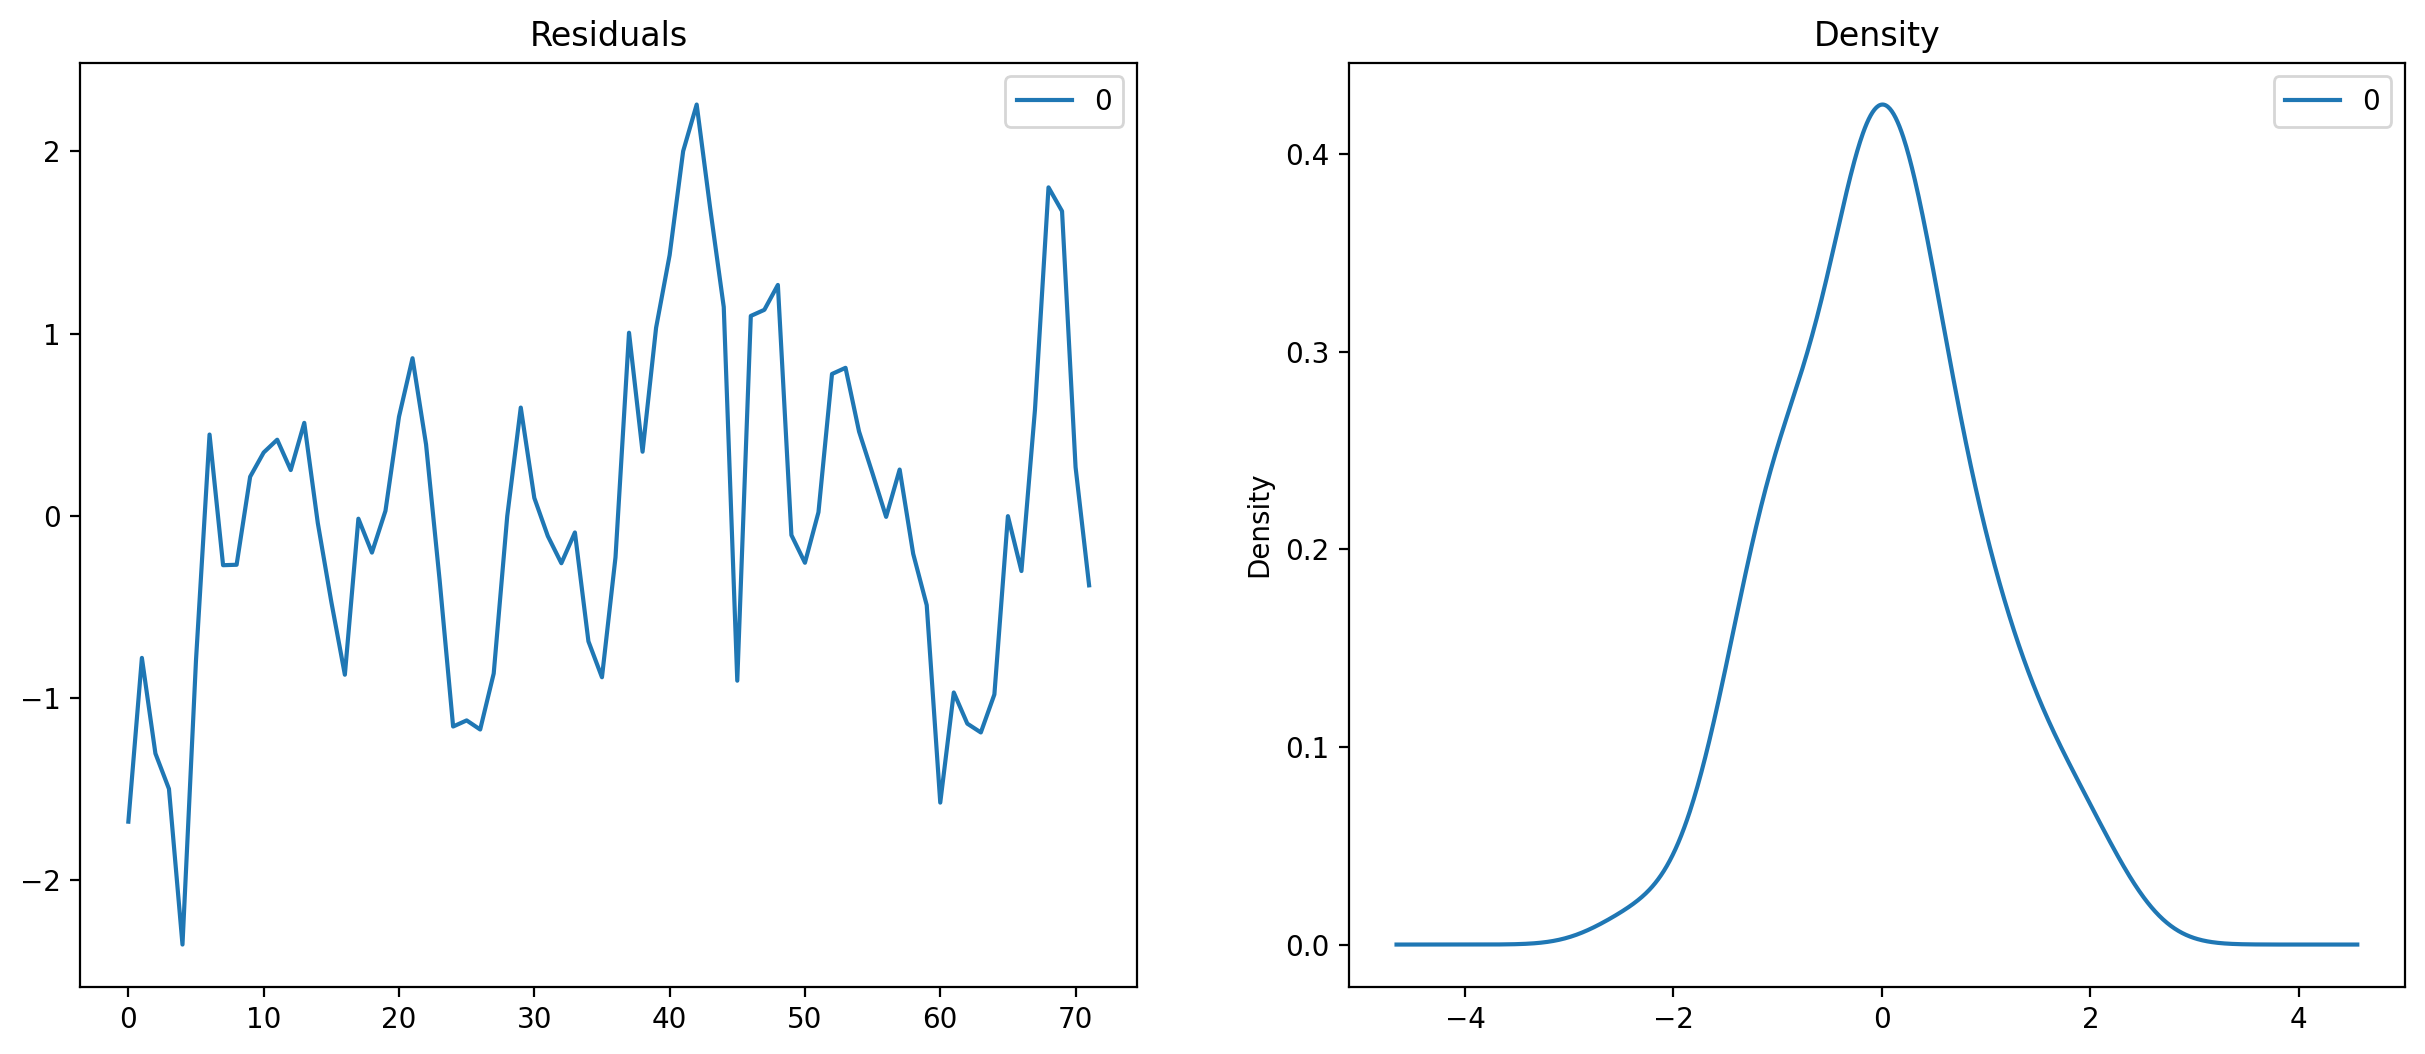

In [90]:
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':200})
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.savefig('res.pdf')
plt.show()


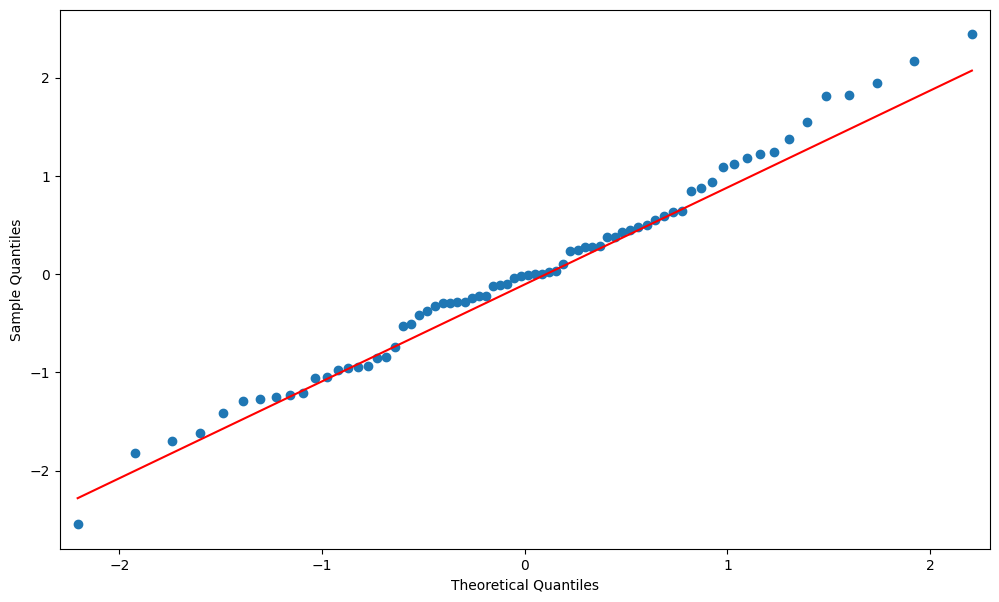

In [95]:
import matplotlib.pyplot as plt
resid = model.resid
# plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':100})
from statsmodels.graphics.api import qqplot

qqplot(resid, line='q', fit=True)
plt.savefig('qq.pdf')
plt.show()

In [93]:
from scipy import stats 
stats.normaltest(resid)

NormaltestResult(statistic=0.2694569591096185, pvalue=0.8739531756308943)

In [112]:
test = m2
xtest = test[[name2[i] for i in range(6)]]
xtest = sm.add_constant(xtest)
pred = model.predict(exog=xtest)

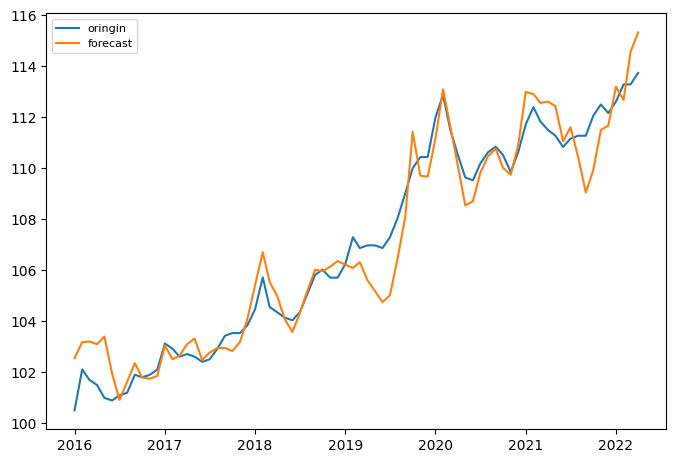

In [114]:
import matplotlib.pyplot as plt
m22 = data[[name[0],name[1]]].dropna()
date2 = pd.to_datetime(m22[name[0]])

plt.plot(date2,cpi_adj, label='oringin')

plt.plot(date2,pred, label='forecast')

plt.legend(loc='upper left', fontsize=8)
plt.savefig('predict2.pdf')
plt.show()

In [101]:
cpi_adj[-5:]

[112.16826345262261,
 112.6169365064331,
 113.2926381254717,
 113.2926381254717,
 113.74580867797359]

Index(['小麦（中等）集贸市场价格当期值(元/公斤)', '花生仁（中等）集贸市场价格当期值(元/公斤)',
       '活猪（中等）集贸市场价格当期值(元/公斤)', '鲤鱼（1-2公斤）集贸市场价格当期值(元/公斤)',
       '黄瓜（中等）集贸市场价格当期值(元/公斤)', '香蕉（中等）集贸市场价格当期值(元/公斤)', '居民消费价格指数(上月=100)',
       'cpi_adj'],
      dtype='object')